# Regresión no lineal

Importamos los módulos necesarios:

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.optimize as so
import pandas as pd
from decimal import * #para las cifras significativas

Leemos los datos de un fichero, sea un .txt o un excel:

1. Leer un txt:

In [2]:
"""
archivo=input('Archivo de datos: ') 

def readinputdata(filename):
    fichero=open(filename,'r')
    f=[]
    line='0'
    while len(line)>0:
        line=np.array(fichero.readline().split()).astype(float)
        if len(line)>0 :
            f.append(line)
    fichero.close()
    return np.array(f)

data=readinputdata(archivo)

x=data[:,0]
y=data[:,1]
s=data[:,2]
"""

"\narchivo=input('Archivo de datos: ') \n\ndef readinputdata(filename):\n    fichero=open(filename,'r')\n    f=[]\n    line='0'\n    while len(line)>0:\n        line=np.array(fichero.readline().split()).astype(float)\n        if len(line)>0 :\n            f.append(line)\n    fichero.close()\n    return np.array(f)\n\ndata=readinputdata(archivo)\n\nx=data[:,0]\ny=data[:,1]\ns=data[:,2]\n"

2. Leer un Excel:

In [11]:
cdir = 'C:\\Users\\sergi\\OneDrive\\Escritorio\\FÍSICA\\QUINTO\\TÉCNICAS IV\\Sólido\\Efecto Hall\\'  #si da error, probar a poner solo una /
nombre = 'HallGe.xlsx' #nombre del archivo
xls = pd.ExcelFile(cdir+nombre)

datos = pd.read_excel(xls, sheet_name= 'Sheet1', header=0, nrows= 10) #leer los datos
y = np.array(datos['coc'],'float') # y ('nombre de la columna')
x = np.array(datos['B magnetorresistencia (T)'],'float') # datos de conteo (x)
error_y = np.array(datos['Error cociente'],'float')
#error_x = np.array(datos['ΔB magnetorresistencia'],'float')

Definimos una función de ajuste:

In [12]:
#parámetros
#x0 = 1 #constante
a=[] #parámetros a ajustar
b=[]
c=[]
#función de ajuste
def fun(x, b):
    y = b*(x**2)
    return y

#valores iniciales de los parámetros
par = [10**(-7)]

Ajuste de los datos leídos a la curva:

In [13]:
sol , cov = so.curve_fit(fun , x , y, p0=(par), sigma=error_y)
#cov = matriz de covarianza , sol = resultados de los parámetros
#a_aux = sol[0] #parámetros que mejor se ajustan a los datos
b_aux = sol[0]
#c_aux = sol[2]
#sa_aux , sb_aux = np.sqrt(np.diag(cov)) #desviaciones estándar (diagonal de la matriz de covarianza)
sb_aux = np.sqrt(np.diag(cov))

Escribimos las cifras significativas correctamente:

In [14]:
#sa = Decimal('%s' % float('%.2g' % sa_aux)) #incertidumbres con 2 cifras significativas
sb = Decimal('%s' % float('%.2g' % sb_aux))
#sc = Decimal('%s' % float('%.2g' % sc_aux))

In [15]:
#csa = Decimal(sa) #calculamos el número de decimales (no cifras) significativos de las incertidumbres
#csa.as_tuple().exponent
#decimales_significativos_a = abs(csa.as_tuple().exponent)

csb = Decimal(sb)
csb.as_tuple().exponent
decimales_significativos_b = abs(csb.as_tuple().exponent)

#csc = Decimal(sb)
#csc.as_tuple().exponent
#decimales_significativos_c = abs(csc.as_tuple().exponent)

In [16]:
#a = round(a_aux, decimales_significativos_a) #redondeamos el valor medio al número de decimales significativos
b = round(b_aux, decimales_significativos_b)
#c = round(b_aux, decimales_significativos_c)

In [17]:
print('Parámetros del ajuste:')
#print('a = ', a,'\u00B1',sa) #\u00B1 es el símbolo ±
print('b = ', b,'\u00B1',sb)
#print('c = ', c,'\u00B1',sc)

Parámetros del ajuste:
b =  1.486e-07 ± 2.3E-9


### Representación gráfica

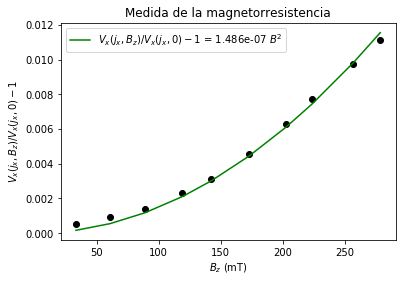

In [19]:
plt.clf()

plt.plot(x, y, 'ko')
#n=len(x); p=[0, n-1]
y_ajuste = b*x**2
plt.plot(x, y_ajuste, 'g-', label='$V_{x}(j_{x},B_{z})/V_{x}(j_{x},0)-1$ = %g $B^{2}$' % (b))
plt.title('Medida de la magnetorresistencia')
plt.xlabel('$B_{z}$ (mT)', fontsize=10)
plt.ylabel('$V_{x}(j_{x},B_{z})/V_{x}(j_{x},0)-1$', fontsize=10)
plt.xticks(fontsize=10); plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=10)
plt.savefig("magnetorresistencia.pdf", format="pdf")
#plt.errorbar(x, y, yerr=error_y, xerr=0, capsize=1.2, elinewidth=0.4, fmt='b.')
plt.show()

#plt.xlim(1900 , 2020)
#plt.ylim(0, 0.5)
#plt.savefig('')
#plt.grid(False)
#plt.errorbar(t1 , x1 , capsize=1.2, elinewidth=0.4, fmt='k.')
#plt.errorbar(x, y, yerr=error_y, xerr=0, capsize=1.2, elinewidth=0.4, fmt='b.')